In [284]:
import pandas as pd
import numpy as np
import glob
from sklearn import cluster
from scipy.misc import imread
import skimage.measure as sm
from skimage import transform as sk_transform

# import progressbar
import multiprocessing
import random
import matplotlib.pyplot as plt
%matplotlib inline

new_style = {'grid': False}
plt.rc('axes', **new_style)

def _load_img(file, img_shape=(224,224), c=[0,1000,0,1000]):
    shape = list(img_shape) + [3]
    img = imread(file)
    img = img[c[0]:c[1], c[2]:c[3]]  
    img = sk_transform.resize(img, (img.shape[0],img.shape[1]), preserve_range=True)                  
    img /= 255
    return img

# Function to show 4 images
def show_four(imgs, title):
    select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(4)]
    _, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3))
    plt.suptitle(title, size=20)
    for i, img in enumerate(select_imgs):
        ax[i].imshow(img)

# Function to show 8 images
def show_eight(imgs, title):
    select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(8)]
    _, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(20, 6))
    plt.suptitle(title, size=20)
    for i, img in enumerate(select_imgs):
        ax[i//4, i%4].imshow(img)

# Function for computing distance between images
def compare(args):
    img, img2 = args
    img = (img - img.mean()) / img.std()
    img2 = (img2 - img2.mean()) / img2.std()
    return np.mean(np.abs(img - img2))



In [289]:
train_clusters = pd.read_csv('../output/train_clusters.csv')
print(pd.Series(train_clusters['cluster']).value_counts())
test_clusters = pd.read_csv('../output/test_clusters.csv')
print(pd.Series(test_clusters['cluster']).value_counts())

 2     1218
 0      994
-1      481
 13     214
 1      188
 15      93
 8       59
 4       56
 16      46
 18      46
 14      44
 9       40
 19      35
 5       34
 7       32
 17      31
 3       30
 6       28
 12      26
 20      21
 21      21
 10      20
 11      20
dtype: int64
 2     321
 0     285
 13     64
 1      62
 15     30
 21     27
 3      25
-1      24
 17     22
 18     22
 6      21
 12     16
 4      15
 5      13
 8      10
 9       7
 7       7
 20      7
 16      6
 19      6
 10      6
 14      4
dtype: int64


In [290]:
crop_coords = {'-1': [0,700,0,1000],
        '0':[250,700,400,1000], 
        '1':[250,700,400,1000], 
        '2':[200,600,150,720], 
        '3':[100,500,200,600], 
        '4':[150,650,350,900], 
        '5':[200,500,500,1000], 
        '6':[0,500,500,1000], 
        '7':[100,650,400,900], 
        '8':[0,600,0,600], 
        '9':[50,600,200,800],
        '10':[50,500,400,800],
        '11':[0,600,200,800],
        '12':[300,600,300,700],
        '13':[200,800,200,950],
        '14':[0,500,400,1000],
        '15':[0,300,200,800],
        '16':[200,1000,200,1000], 
        '17':[0,700,300,1000], 
        '18':[200,600,0,700], 
        '19':[250,700,400,1000],
        '20':[100,600,200,1000],
        '21':[100,600,0,700]}

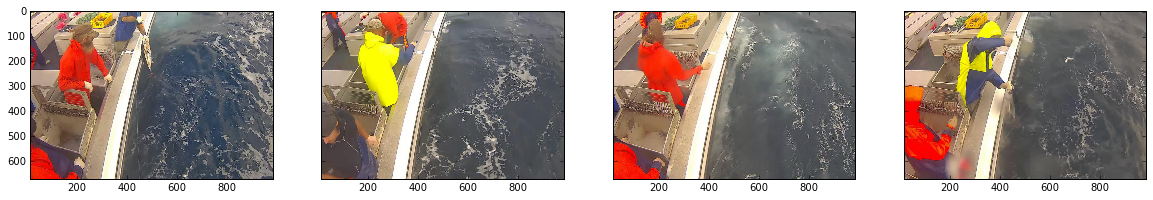

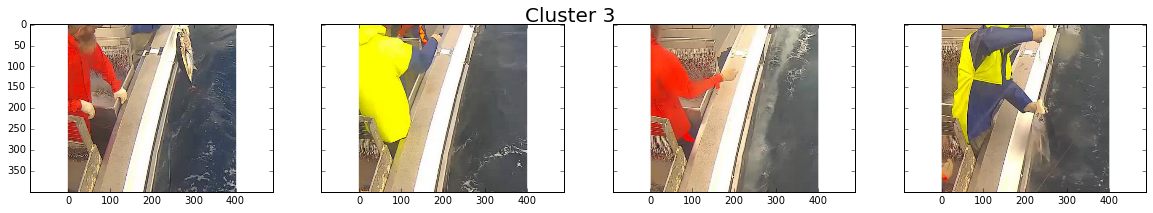

In [293]:
#for i in range(0,np.max(clusters['cluster'])):
i=3
images = train_clusters.loc[train_clusters['cluster']==i][0:4]
_, ax1 = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3))
_, ax2 = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3))
plt.suptitle('Cluster '+str(i), size=20)
for j in range(len(images)):
    imagename = images.iloc[j,0]
    folder = images.iloc[j,2]
    img1 = _load_img('../input/train/'+folder+'/'+imagename, (1000,1000), [0,1000,0,1000])
    img2 = _load_img('../input/train/'+folder+'/'+imagename, (1000,1000), crop_coords[str(i)])
    ax1[j].imshow(img1)
    ax2[j].imshow(img2)


In [269]:
print(test_clusters.loc[test_clusters['cluster']==2][0:4])

              id  cluster
4  img_00027.jpg        2
5  img_00030.jpg        2
6  img_00040.jpg        2
7  img_00046.jpg        2


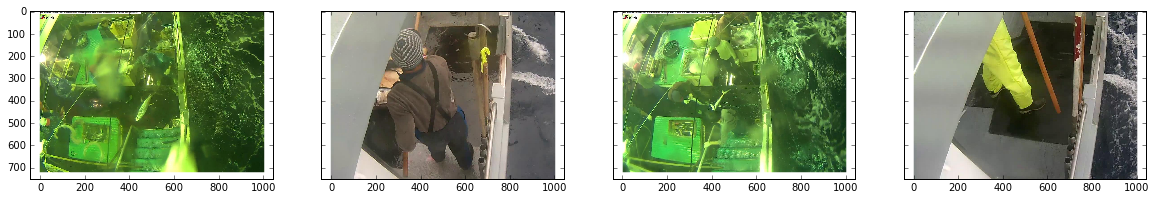

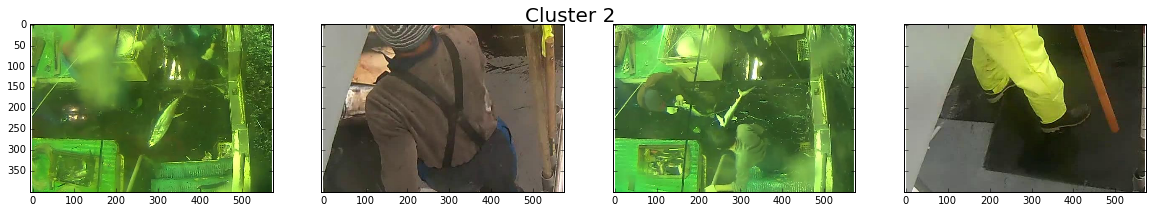

In [297]:
i=2
images = test_clusters.loc[test_clusters['cluster']==i][0:4]
_, ax1 = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3))
_, ax2 = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3))
plt.suptitle('Cluster '+str(i), size=20)
for j in range(len(images)):
    imagename = images.iloc[j,0]
    img1 = _load_img('../input/test_stg1/'+imagename, (1000,1000), [0,1000,0,1000])
    img2 = _load_img('../input/test_stg1/'+imagename, (1000,1000), crop_coords[str(i)])
    ax1[j].imshow(img1)
    ax2[j].imshow(img2)

[[[ 0.59072542  0.35056022  0.35781312]
  [ 0.59212595  0.37969187  0.4437775 ]
  [ 0.59212595  0.61925769  0.42416966]
  ..., 
  [ 0.58693391  0.12507004  0.96490598]
  [ 0.58880466  0.16428572  0.94137657]
  [ 0.59221601  0.19957983  0.85619247]]

 [[ 0.57153773  0.40529212  0.87580031]
  [ 0.57727003  0.44058624  0.85389155]
  [ 0.59214598  0.46943778  0.84173667]
  ..., 
  [ 0.05853253  0.44670868  0.60000002]
  [ 0.08598351  0.58808523  0.63921571]
  [-0.02062913  0.49788916  0.64705884]]

 [[ 0.0499591   0.4429872   0.41176471]
  [ 0.10318039  0.58039218  0.44313726]
  [ 0.01788628  0.49019608  0.45490196]
  ..., 
  [ 0.57538927  0.64485794  0.41274509]
  [ 0.57538927  0.69527811  0.52815127]
  [ 0.58209193  0.97407961  0.512465  ]]

 ..., 
 [[ 0.29222688  0.45707282  0.28208283]
  [ 0.32549021  0.48772508  0.28600439]
  [ 0.69607842  0.47203881  0.26247498]
  ..., 
  [ 0.10588235  0.92436975  0.24334733]
  [ 0.15686275  0.92044818  0.13109244]
  [ 0.1882353   0.86719686  0.12857